In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/home/youmna/Heart-Disease-Prediction/data/reduced_heart_disease.csv')

X = df.drop('target', axis=1)
y = df['target']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


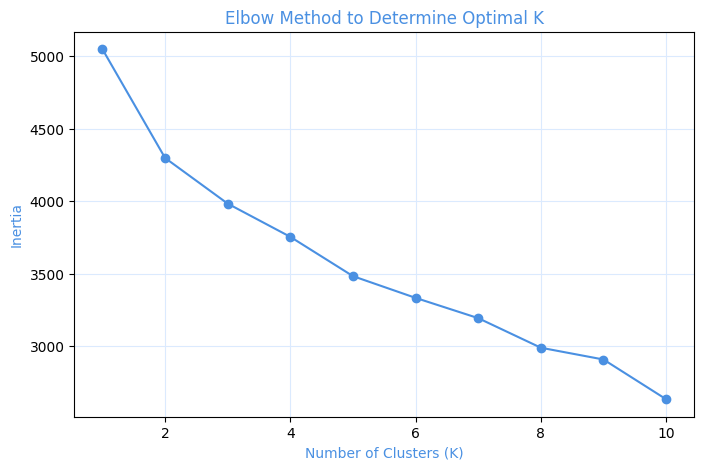

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertias, marker='o', color='#4a90e2')
plt.title('Elbow Method to Determine Optimal K', color='#4a90e2')
plt.xlabel('Number of Clusters (K)', color='#4a90e2')
plt.ylabel('Inertia', color='#4a90e2')
plt.grid(True, color='#dbeafe')
plt.show()


In [3]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)


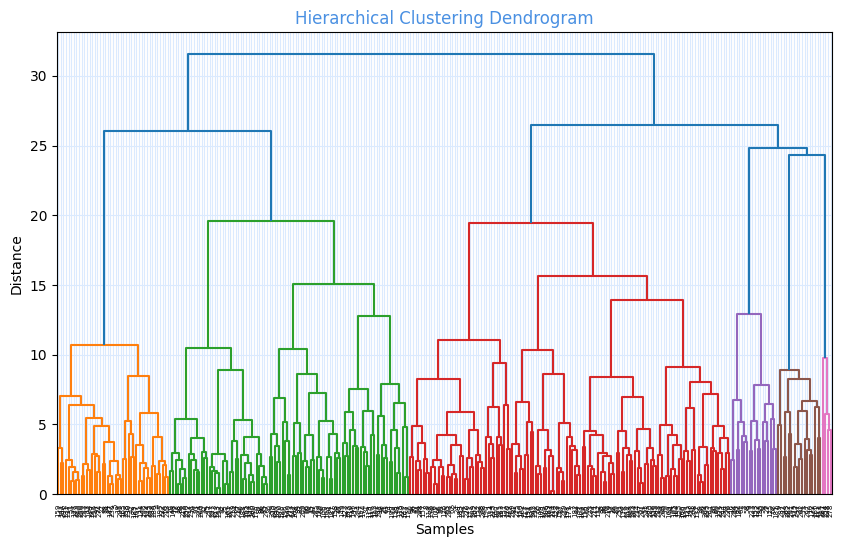

In [4]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram', color='#4a90e2')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True, color='#dbeafe')
plt.show()


In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2)
df['Cluster_Hierarchical'] = hc.fit_predict(X_scaled)


In [6]:
print(" KMeans vs Actual:")
print(pd.crosstab(df['target'], df['Cluster_KMeans']))

print("\n Hierarchical vs Actual:")
print(pd.crosstab(df['target'], df['Cluster_Hierarchical']))


 KMeans vs Actual:
Cluster_KMeans   0    1
target                 
0               29  131
1               28   26
2               33    2
3               33    2
4               12    1

 Hierarchical vs Actual:
Cluster_Hierarchical   0    1
target                       
0                     60  100
1                     35   19
2                     30    5
3                     26    9
4                     11    2
